
Analyzing Delta data:
Data loaded: data/Delta.xlsx
            Group  Value
0  Original Delta  2.010
1  Original Delta  2.150
2  Original Delta  2.201
3  Original Delta  1.470
4  Original Delta  0.271
Column names: ['Group', 'Value']
Mann-Whitney U test: statistic=181.5, p-value=0.988353
Kruskal-Wallis test: statistic=0.0008524265358177103, p-value=0.976708
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Original Delta vs. Predicted Delta: Mann-Whitney-Wilcoxon test two-sided, P_val:9.884e-01 U_stat=1.815e+02


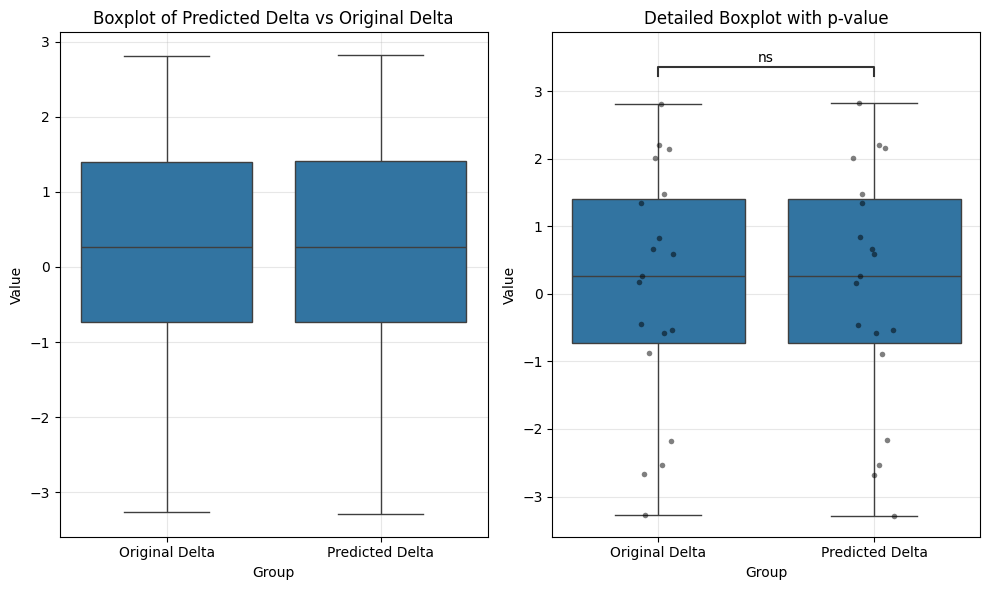


Analyzing Return data:
Data loaded: data/Return.xlsx
             Group   Value
0  Original Return  0.0310
1  Original Return  0.0319
2  Original Return  0.0318
3  Original Return  0.0205
4  Original Return  0.0038
Column names: ['Group', 'Value']
Mann-Whitney U test: statistic=175.5, p-value=0.895466
Kruskal-Wallis test: statistic=0.0213129957431562, p-value=0.883930
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Original Return vs. Predicted Return: Mann-Whitney-Wilcoxon test two-sided, P_val:8.955e-01 U_stat=1.755e+02


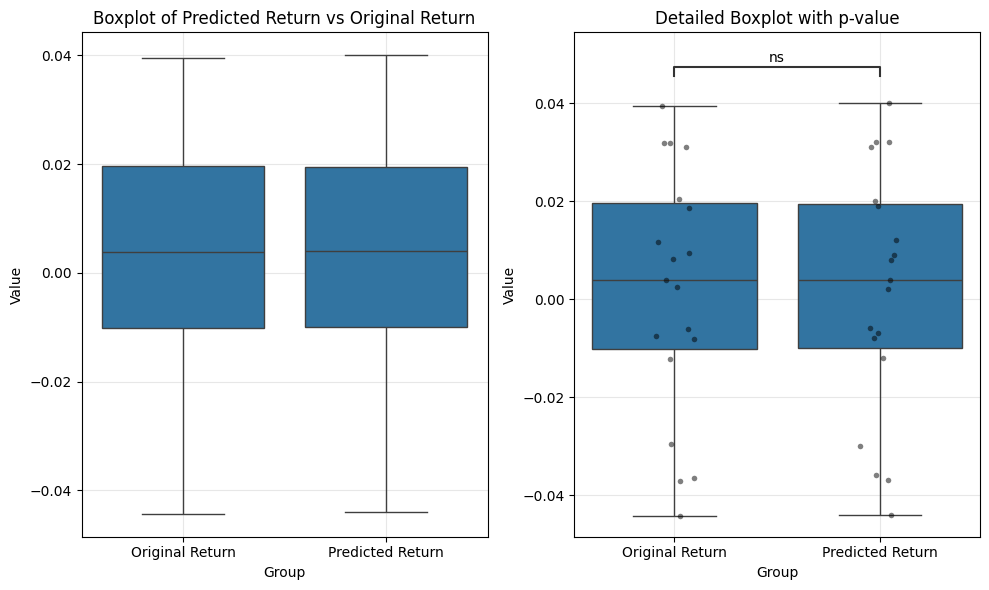


Analyzing PKH data:
Data loaded: data/PKH.xlsx
          Group  Value
0  Original PKH  65.53
1  Original PKH  64.02
2  Original PKH  65.95
3  Original PKH  64.85
4  Original PKH  63.87
Column names: ['Group', 'Value']
Mann-Whitney U test: statistic=17.0, p-value=0.937229
Kruskal-Wallis test: statistic=0.025641025641029103, p-value=0.872780
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Original PKH vs. Predicted PKH: Mann-Whitney-Wilcoxon test two-sided, P_val:9.372e-01 U_stat=1.700e+01


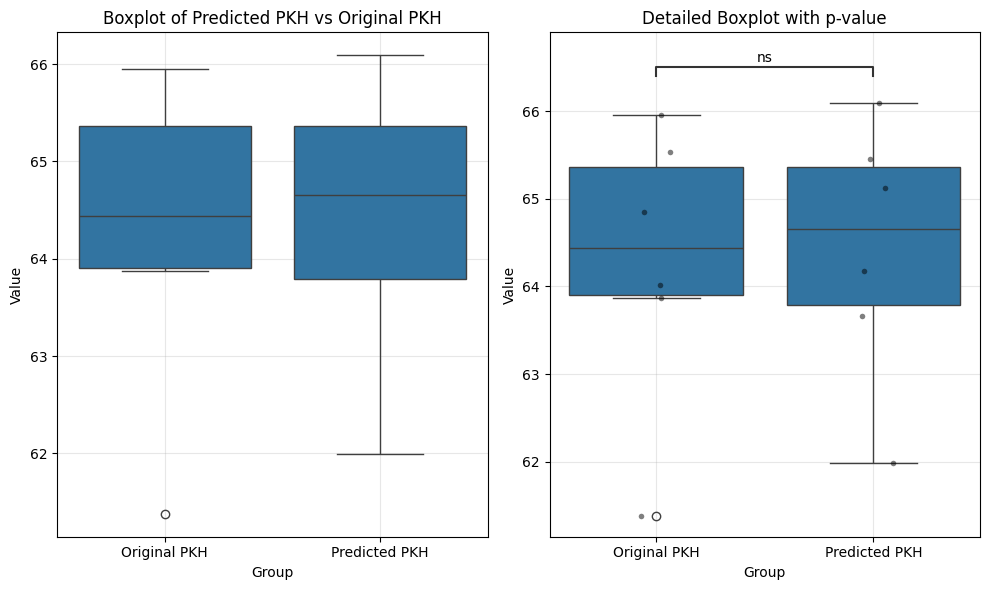


Analyzing TRUDe data:
Data loaded: data/TRUD.xlsx
            Group  Value
0  Original TRUDe  31.40
1  Original TRUDe  31.61
2  Original TRUDe  32.07
3  Original TRUDe  31.47
4  Original TRUDe  33.54
Column names: ['Group', 'Value']
Mann-Whitney U test: statistic=18.0, p-value=1.000000
Kruskal-Wallis test: statistic=0.0, p-value=1.000000
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Original TRUDe vs. Predicted TRUDe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=1.800e+01


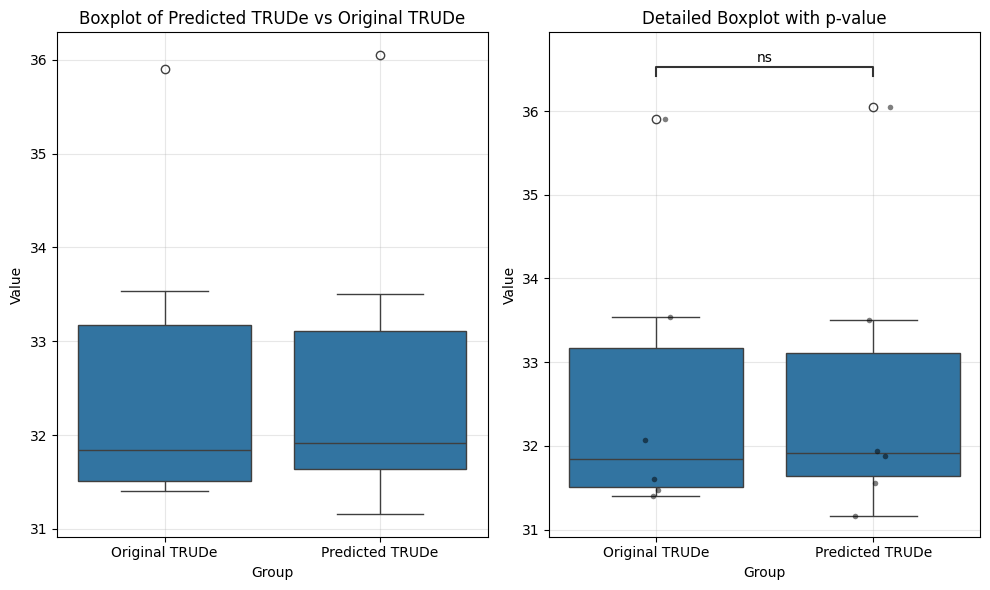

In [4]:
# Two Sample Statistical Tests (Python)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon, kruskal, mannwhitneyu
import statsmodels.api as sm
from statannotations.Annotator import Annotator

# Function to perform statistical tests and create boxplots
def analyze_and_plot(data_file, sheet_name=0, comparison_label=None):
    # Read data
    try:
        data = pd.read_excel(data_file, sheet_name=sheet_name)
        print(f"Data loaded: {data_file}")
        print(data.head())

        # Get column names
        print("Column names:", data.columns.tolist())

        # Perform Wilcoxon test (equivalent to wilcox.test in R)
        group1 = data[data['Group'] == data['Group'].unique()[0]]['Value']
        group2 = data[data['Group'] == data['Group'].unique()[1]]['Value']

        # Mann-Whitney U test (Python equivalent of wilcox.test with paired=FALSE)
        stat, pvalue = mannwhitneyu(group1, group2)
        print(f"Mann-Whitney U test: statistic={stat}, p-value={pvalue:.6f}")

        # Kruskal-Wallis test
        stat, pvalue = kruskal(group1, group2)
        print(f"Kruskal-Wallis test: statistic={stat}, p-value={pvalue:.6f}")

        # Create boxplot
        plt.figure(figsize=(10, 6))

        # Simple boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x='Group', y='Value', data=data)
        plt.title(f"Boxplot of {comparison_label}")
        plt.grid(True, alpha=0.3)

        # Advanced boxplot with statistical annotation
        plt.subplot(1, 2, 2)
        ax = sns.boxplot(x='Group', y='Value', data=data)

        # Add jitter points
        sns.stripplot(x='Group', y='Value', data=data, color='black', alpha=0.5, size=4)

        # Add statistical annotation
        pairs = [(data['Group'].unique()[0], data['Group'].unique()[1])]
        annotator = Annotator(ax, pairs, data=data, x='Group', y='Value')
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()

        plt.title(f"Detailed Boxplot with p-value")
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return data

    except Exception as e:
        print(f"Error processing {data_file}: {e}")
        return None

# Example usage
# You would need to replace these file paths with your actual file paths
data_files = {
    "Delta": "data/Delta.xlsx",
    "Return": "data/Return.xlsx",
    "PKH": "data/PKH.xlsx",
    "TRUDe": "data/TRUD.xlsx"
}

# Color palettes matching the R code
color_palettes = {
    "Delta": ["navyblue", "royalblue"],
    "Return": ["green4", "green3"],
    "PKH": ["firebrick", "firebrick1"],
    "TRUDe": ["darkorchid4", "darkorchid3"]
}

# Process each dataset
for name, file_path in data_files.items():
    print(f"\nAnalyzing {name} data:")
    comparison_label = f"Predicted {name} vs Original {name}"
    analyze_and_plot(file_path, comparison_label=comparison_label)
